# One hot Encoding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [10]:
df.fuel.value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


<Axes: ylabel='count'>

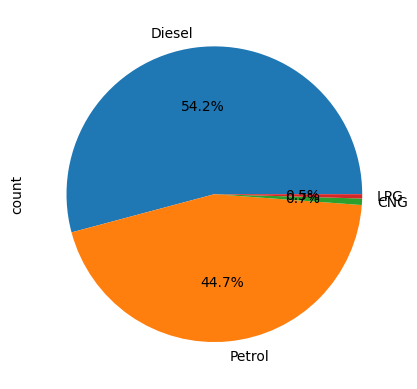

In [11]:
from enum import auto
df["fuel"].value_counts().plot(kind="pie",autopct="%1.1f%%")

## lets perform one hot encoding on fuel and owner then we will se on brand

In [4]:
df.owner.value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


<Axes: ylabel='count'>

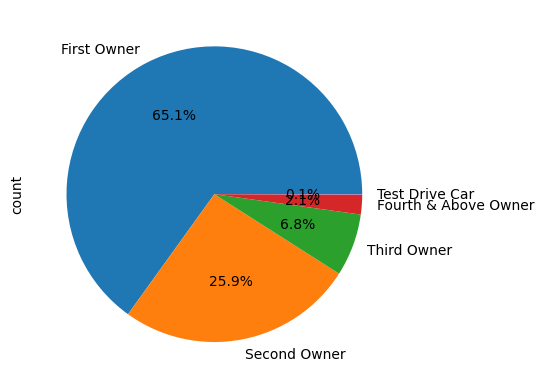

In [8]:
from enum import auto
df["owner"].value_counts().plot(kind="pie",autopct="%1.1f%%")

## 1. One hot encoding using pandas

In [9]:
pd.get_dummies(df, columns=["fuel", "owner"])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


owner column has 5 categories and fuel has 4 also so there are **9** extra columns

## Performing Multicolinearity analysis

In [12]:
pd.get_dummies(df, columns=["fuel", "owner"], drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


See first two columns of both the subsets are now removed

## 3. OneHotEncoding using Sklearn

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size=0.2, random_state=2)

In [16]:
X_train.head()

,brand,km_driven,fuel,owner
5571,Hyundai,35000,Diesel,First Owner
2038,Jeep,60000,Diesel,First Owner
2957,Hyundai,25000,Petrol,First Owner
7618,Mahindra,130000,Diesel,Second Owner
6684,Hyundai,155000,Diesel,First Owner


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder()

In [20]:
ohe.fit_transform(X_train[["fuel", "owner"]])

<6502x9 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in Compressed Sparse Row format>

In [23]:
ohe.fit_transform(X_train[["fuel", "owner"]]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
shape_check = ohe.fit_transform(X_train[["fuel", "owner"]]).toarray().shape

In [25]:
shape_check

(6502, 9)

### we can see it has 5 + 4 = 9 columns

### now lets drop first columns

In [26]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [27]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
X_train_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [28]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [29]:
X_train_new.shape

(6502, 7)

In [31]:
np.hstack((X_train[["brand", "km_driven"]].values, X_train_new))

array([['Hyundai', 35000, 1, ..., 0, 0, 0],
       ['Jeep', 60000, 1, ..., 0, 0, 0],
       ['Hyundai', 25000, 0, ..., 0, 0, 0],
       ...,
       ['Tata', 15000, 0, ..., 0, 0, 0],
       ['Maruti', 32500, 1, ..., 1, 0, 0],
       ['Isuzu', 121000, 1, ..., 0, 0, 0]], dtype=object)

## 4. OneHotEncoding with Top Categories

In [34]:
counts = df["brand"].value_counts()
counts

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


<Axes: ylabel='brand'>

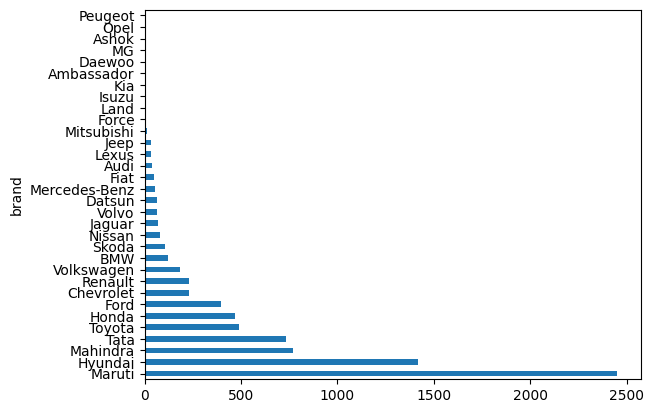

In [47]:
df["brand"].value_counts().plot(kind="barh")

In [49]:
df['brand'].nunique()

32

In [51]:
counts[counts <= 100]

,count
brand,
Nissan,81
Jaguar,71
Volvo,67
Datsun,65
Mercedes-Benz,54
Fiat,47
Audi,40
Lexus,34
Jeep,31


In [52]:
counts[counts <= 100].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object', name='brand')

In [59]:
replacments = counts[counts <= 100].index

In [58]:
pd.get_dummies(df['brand'].replace(replacments, "Other cars")).sample(5)

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Other cars,Renault,Skoda,Tata,Toyota,Volkswagen
683,False,False,False,False,False,True,False,False,False,False,False,False,False
5058,False,False,False,False,True,False,False,False,False,False,False,False,False
3448,False,False,False,False,False,False,True,False,False,False,False,False,False
4970,False,False,False,False,False,True,False,False,False,False,False,False,False
258,False,False,False,False,False,True,False,False,False,False,False,False,False
